In [286]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
random.seed(17)

# Core Algorithm

In [287]:
class Regression:
    def __init__(self, training_data, n_features, learn_rate=10, n_iter=100, tolerance=1):
        """
            training_data: DataFrame; raw dataset with two independent variables;
            weights: array; output; coefficients
            x: array; first independent variable;
            y: array; second independent variable;
            label: correct provided label;
        """
        self.training_data = training_data
        self.weights = np.zeros(n_features + 1)
        self.learn_rate = learn_rate
        self.n_iter = n_iter
        self.tolerance = tolerance

        self.label = training_data['label'].to_numpy()
    
    def prepare_x(self, index):
        x = [1]
        for column_name in self.training_data.columns:
            if column_name != "label":
                x.append(self.training_data[column_name].to_numpy()[index])
        return x
        
    def calculate_gradient(self, lamb = 0):
        length = len(self.label)
        total = 0
        for index in range(length):
            x = self.prepare_x(index)
            total += np.multiply(((np.dot(np.transpose(self.weights), x)) - self.label[index]), x)
        gradient = (2 * total)/length + 2 * lamb * self.weights
        return gradient
    
    def bgd(self):
        for _ in range(self.n_iter):
            gradient = self.calculate_gradient()
            self.weights -= self.learn_rate * gradient
            if np.linalg.norm(gradient) <= self.tolerance:
                break
        return self.weights
    
    def calculate_stochastic_gradient(self, lamb = 0):
        length = len(self.label)
        index = random.randint(0, length-1)
        x = self.prepare_x(index)
        loss_deriv = np.multiply(((np.dot(np.transpose(self.weights), x)) - self.label[index]), x)
        gradient = (2 * loss_deriv)/length + 2 * lamb * self.weights
        return gradient
    
    def sgd(self):
        learn_rate = 1
        for t in range(self.n_iter):
            gradient = self.calculate_stochastic_gradient()
            self.weights -= learn_rate * gradient
            if t != 0:
                learn_rate = 1/t
            # print(np.linalg.norm(gradient))
            if np.linalg.norm(gradient) <= self.tolerance:
                break
        return self.weights
        


# Testing

In [288]:
data = pd.read_csv("data.csv")
data.rename(columns={'Salary': 'label'}, inplace=True)
data.rename(columns={'YearsExperience' : '1'}, inplace=True)

regression = Regression(training_data=data, n_features=1, learn_rate=0.01, n_iter=500, tolerance=10)
weights = regression.bgd()

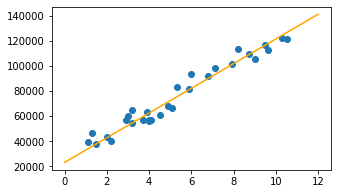

In [289]:
#visualize raw data
line_indpt = np.linspace(0, 12, 100)
line = weights[1] * line_indpt + weights[0]
plt.figure(figsize=(5,3))
plt.scatter(data['1'], data["label"])
plt.plot(line_indpt, line, color="orange")

### Testing SGD

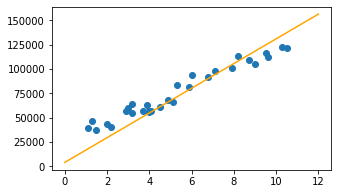

In [290]:
data = pd.read_csv("data.csv")
data.rename(columns={'Salary': 'label'}, inplace=True)
data.rename(columns={'YearsExperience' : '1'}, inplace=True)

regression = Regression(training_data=data, n_features=1, n_iter=1000, tolerance=10)
weights = regression.sgd()

#visualize raw data
line_indpt = np.linspace(0, 12, 100)
line = weights[1] * line_indpt + weights[0]
plt.figure(figsize=(5,3))
plt.scatter(data['1'], data["label"])
plt.plot(line_indpt, line, color="orange")

# Polynomial Basis and Non-Linear Regression

No linear classifier in two dimensions; try transform it into a higher-dimensional dataset.\
Let $k=2$; the feature transformation is:\
$\phi((x_1,x_2))=(1,x_1,x_2, x_1^2, x_1x_2, x_2^2)$

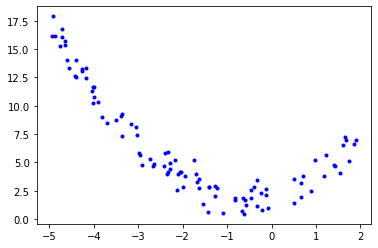

In [291]:
x = 7 * np.random.rand(100, 1) - 5
y = 0.8 * x**2 + 0.9*x + 2 + np.random.randn(100, 1)
plt.plot(x, y, 'b.')

In [326]:
raw_data = {
    "1": [item for sublist in x for item in sublist],
    "label": [item for sublist in y for item in sublist]
}

data = pd.DataFrame(raw_data)

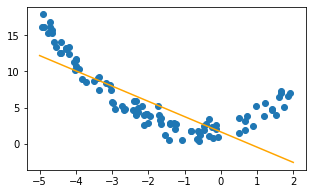

In [327]:
# try linear regression
regression = Regression(training_data=data, n_features=1, learn_rate=0.05, n_iter=10, tolerance=1)
weights = regression.bgd()

line_indpt = np.linspace(-5, 2, 500)
line = weights[1] * line_indpt + weights[0]
plt.figure(figsize=(5,3))
plt.scatter(data['1'], data["label"])
plt.plot(line_indpt, line, color="orange")

In [294]:
# run polynomial basis
data["2"] = [i**2 for i in raw_data["1"]]
data.head(5)

,1,label,2
0,1.846216,6.659825,3.408514
1,-4.645009,15.321636,21.576107
2,-0.631840,1.840396,0.399222
3,-2.291867,4.438437,5.252655
4,-4.720102,16.753276,22.279359


[1.85936842 0.84356097 0.79750707]


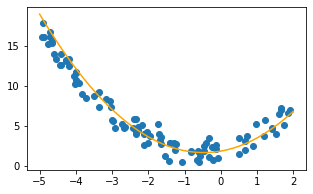

In [324]:
# try regression with polynomial basis
regression = Regression(training_data=data, n_features=2, learn_rate=0.005, n_iter=400, tolerance=0.01)
weights = regression.bgd()
print(weights)
line_indpt = np.linspace(-5, 2, 500)
line = weights[0] + weights[1] * line_indpt ** 2 + weights [2] * line_indpt

plt.figure(figsize=(5,3))
plt.scatter(data['1'], data["label"])
plt.plot(line_indpt, line, color="orange")

### Testing SGD

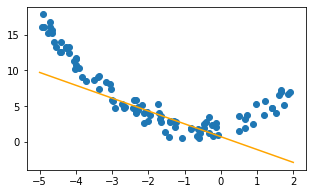

In [299]:
raw_data = {
    "1": [item for sublist in x for item in sublist],
    "label": [item for sublist in y for item in sublist]
}
data = pd.DataFrame(raw_data)

regression = Regression(training_data=data, n_features=1, n_iter=1000, tolerance=0.0001)
weights = regression.sgd()

#visualize raw data
line_indpt = np.linspace(-5, 2, 100)
line = weights[1] * line_indpt + weights[0]
plt.figure(figsize=(5,3))
plt.scatter(data['1'], data["label"])
plt.plot(line_indpt, line, color="orange")

[-0.24692848  0.63704682  0.88781669]


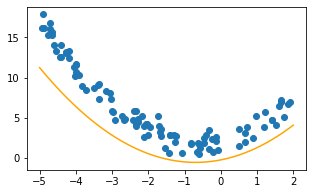

In [320]:
# run polynomial basis
data["2"] = [i**2 for i in raw_data["1"]]
data.head(5)
# try regression with polynomial basis
regression = Regression(training_data=data, n_features=2, learn_rate=0.001, n_iter=2000, tolerance=0.00001)
weights = regression.sgd()
print(weights)
line_indpt = np.linspace(-5, 2, 500)
line = weights[0] + weights[1] * line_indpt ** 2 + weights [2] * line_indpt

plt.figure(figsize=(5,3))
plt.scatter(data['1'], data["label"])
plt.plot(line_indpt, line, color="orange")